## Test different compressions (2, 4, 5 params)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 140
mpl.rcParams['figure.dpi'] = 140
import numpy as np
# our own modules
from lace.cosmo import camb_cosmo
from lace.likelihood import recons_cosmo
from lace.likelihood import linear_power_model

In [2]:
# specify pivot point
z_star=3.0
kp_kms=0.009
# specify test redshifts
zs=[2,3,4]

In [3]:
# define test cosmology
cosmo_test=camb_cosmo.get_cosmology(omch2=0.05,As=9e-9)
camb_cosmo.print_info(cosmo_test)
camb_results_test=camb_cosmo.get_camb_results(cosmo_test,zs=zs)
linP_model_test=linear_power_model.LinearPowerModel(cosmo=cosmo_test,camb_results=camb_results_test)
k_kms_test, _, linP_kms_test=camb_cosmo.get_linP_kms(cosmo_test,zs=zs,camb_results=camb_results_test)
linP_model_test.get_params()

H0 = 6.7000E+01, Omega_b h^2 = 2.2000E-02, Omega_c h^2 = 5.0000E-02, Omega_k = 0.0000E+00, Omega_nu h^2 = 0.0000E+00, A_s = 9.0000E-09, n_s = 9.6500E-01, alpha_s = 0.0000E+00


{'f_star': 0.9567654476657954,
 'g_star': 0.9252713324381153,
 'Delta2_star': 0.28340088498529814,
 'n_star': -2.408472640424278,
 'alpha_star': -0.1645501952859566}

In [4]:
# define fiducial cosmology
cosmo_fid=camb_cosmo.get_cosmology()
camb_cosmo.print_info(cosmo_fid)
camb_results_fid=camb_cosmo.get_camb_results(cosmo_fid,zs=zs,fast_camb=True)
linP_model_fid=linear_power_model.LinearPowerModel(cosmo=cosmo_fid,camb_results=camb_results_fid)
k_kms_fid, _, linP_kms_fid=camb_cosmo.get_linP_kms(cosmo_fid,zs=zs,camb_results=camb_results_fid)
linP_model_fid.get_params()

H0 = 6.7000E+01, Omega_b h^2 = 2.2000E-02, Omega_c h^2 = 1.2000E-01, Omega_k = 0.0000E+00, Omega_nu h^2 = 0.0000E+00, A_s = 2.1000E-09, n_s = 9.6500E-01, alpha_s = 0.0000E+00


{'f_star': 0.9813416724832917,
 'g_star': 0.9677508579459803,
 'Delta2_star': 0.3603423347991143,
 'n_star': -2.299511628221449,
 'alpha_star': -0.21629042976377164}

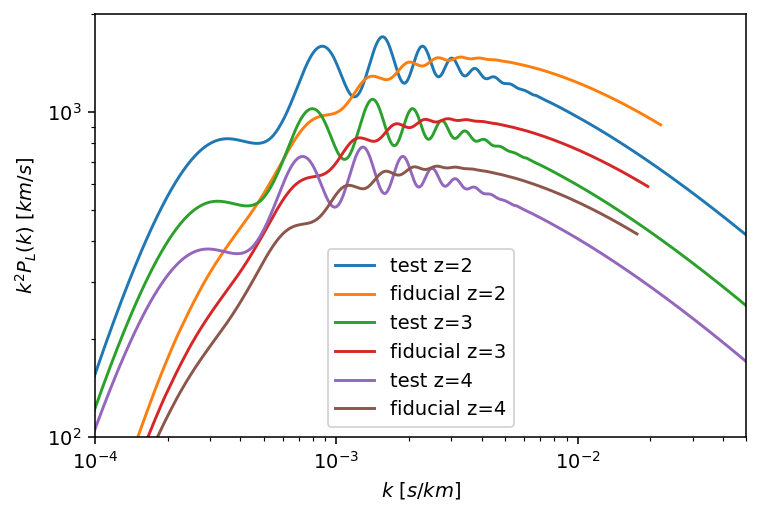

In [5]:
# compare linear power predictions (in s/km)
for iz,z in enumerate(zs):
    plt.loglog(k_kms_test[iz],k_kms_test[iz]**2*linP_kms_test[iz],label='test z={}'.format(z))
    plt.loglog(k_kms_fid[iz],k_kms_fid[iz]**2*linP_kms_fid[iz],label='fiducial z={}'.format(z))
    plt.legend()
    plt.xlabel(r'$k ~ [s/km]$')
    plt.ylabel(r'$k^2 P_L(k) ~ [km/s]$')
    plt.xlim([1.e-4,5e-2])
    plt.ylim([1.e2,2e3])

In [6]:
recons=recons_cosmo.ReconstructedCosmology(zs=zs,emu_kp_Mpc=0.7,
                                    like_z_star=z_star,like_kp_kms=kp_kms,cosmo_fid=cosmo_fid)

In [7]:
linP_params_test=linP_model_test.get_params()

In [8]:
like_params_test=linP_model_test.get_likelihood_parameters()

In [9]:
linP_model_p2=recons.get_linP_model(like_params=like_params_test[2:4])
linP_model_p2.get_params()

{'f_star': 0.9813416724832917,
 'g_star': 0.9677508579459803,
 'Delta2_star': 0.28340088498529814,
 'n_star': -2.408472640424278,
 'alpha_star': -0.21629042976377164}

In [10]:
linP_model_p4=recons.get_linP_model(like_params=like_params_test[:4])
linP_model_p4.get_params()

{'f_star': 0.9567654476657954,
 'g_star': 0.9252713324381153,
 'Delta2_star': 0.28340088498529814,
 'n_star': -2.408472640424278,
 'alpha_star': -0.21629042976377164}

In [11]:
linP_model_p5=recons.get_linP_model(like_params=like_params_test)
linP_model_p5.get_params()

{'f_star': 0.9567654476657954,
 'g_star': 0.9252713324381153,
 'Delta2_star': 0.28340088498529814,
 'n_star': -2.408472640424278,
 'alpha_star': -0.1645501952859566}

In [12]:
for par in like_params_test:
    print(par.info_str())

g_star = 0.9252713324381153
f_star = 0.9567654476657954
Delta2_star = 0.28340088498529814
n_star = -2.408472640424278
alpha_star = -0.1645501952859566


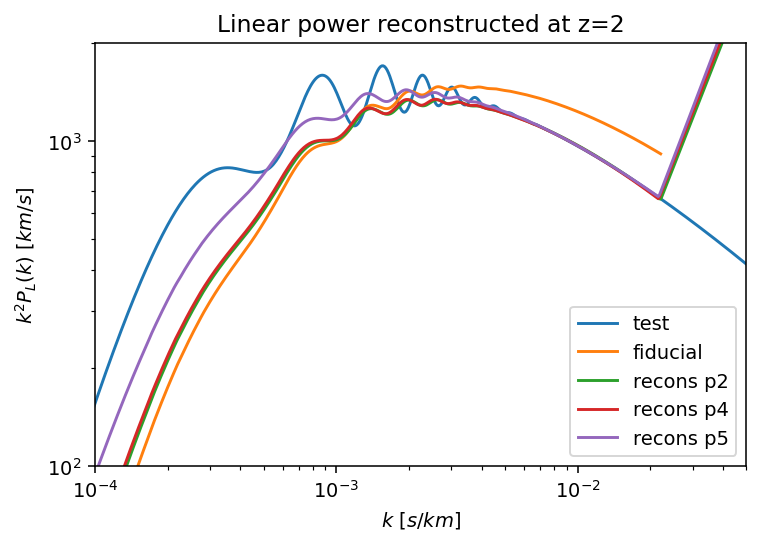

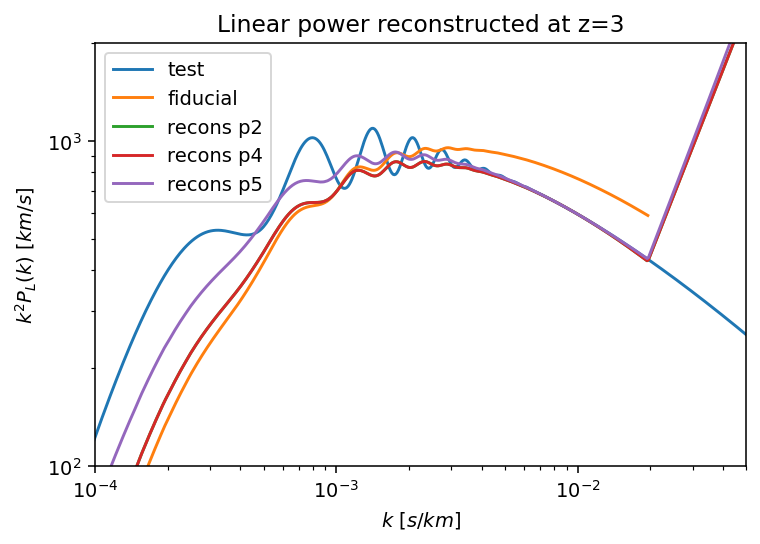

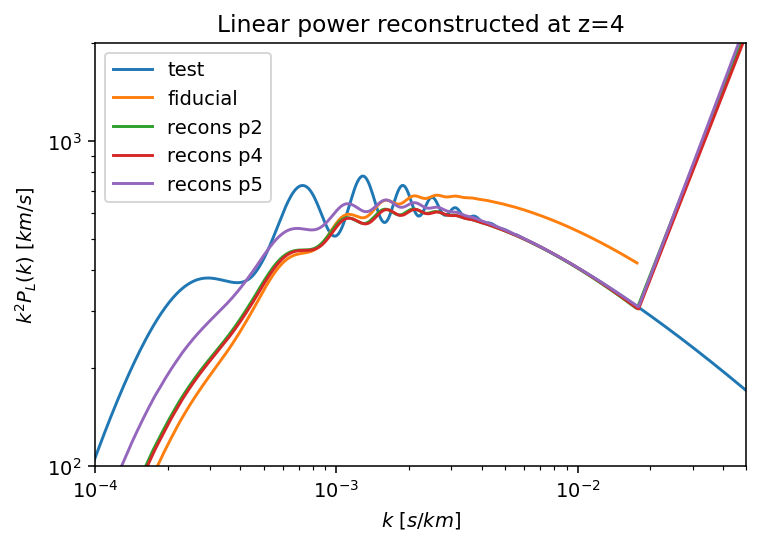

In [13]:
for iz,z in enumerate(zs):
    plt.figure()
    k_kms=k_kms_test[iz]
    linP_kms_p2=recons.reconstruct_linP_kms(iz=iz,k_kms=k_kms,linP_model=linP_model_p2)
    linP_kms_p4=recons.reconstruct_linP_kms(iz=iz,k_kms=k_kms,linP_model=linP_model_p4)
    linP_kms_p5=recons.reconstruct_linP_kms(iz=iz,k_kms=k_kms,linP_model=linP_model_p5)
    plt.loglog(k_kms,k_kms**2*linP_kms_test[iz],label='test')
    plt.loglog(k_kms_fid[iz],k_kms_fid[iz]**2*linP_kms_fid[iz],label='fiducial')
    plt.loglog(k_kms,k_kms**2*linP_kms_p2,label='recons p2')
    plt.loglog(k_kms,k_kms**2*linP_kms_p4,label='recons p4')
    plt.loglog(k_kms,k_kms**2*linP_kms_p5,label='recons p5')
    plt.legend()
    plt.title('Linear power reconstructed at z={}'.format(z))
    plt.xlabel(r'$k ~ [s/km]$')
    plt.ylabel(r'$k^2 P_L(k) ~ [km/s]$')
    plt.xlim([1.e-4,5e-2])
    plt.ylim([1.e2,2e3])

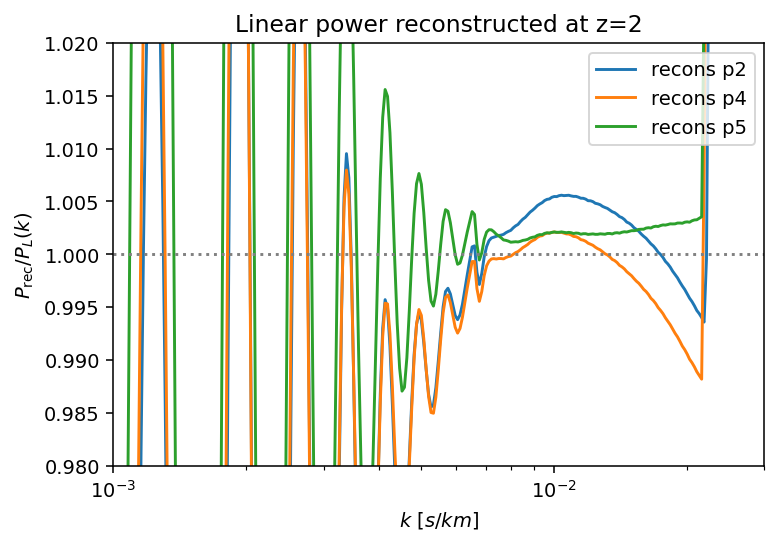

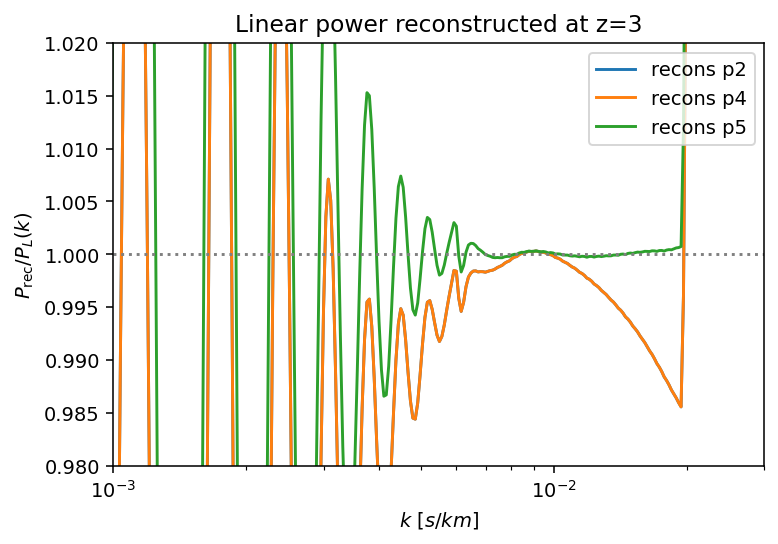

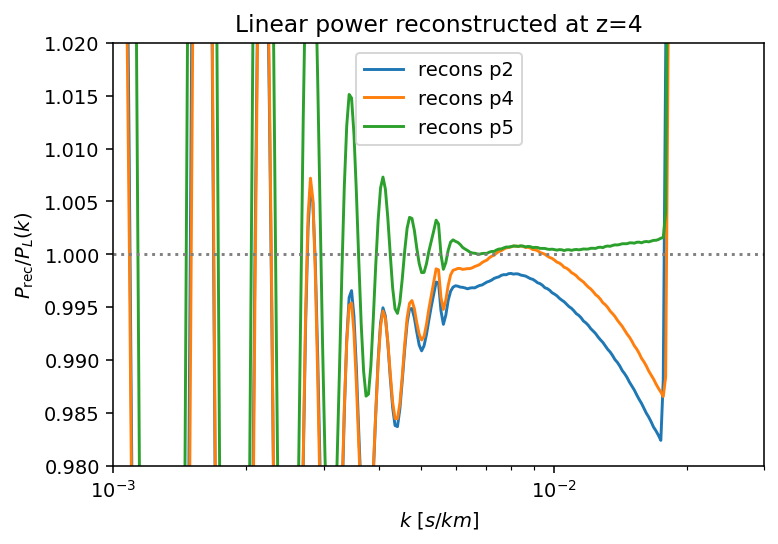

In [14]:
for iz,z in enumerate(zs):
    plt.figure()
    k_kms=k_kms_test[iz]
    linP_kms=linP_kms_test[iz]
    linP_kms_p2=recons.reconstruct_linP_kms(iz=iz,k_kms=k_kms,linP_model=linP_model_p2)
    linP_kms_p4=recons.reconstruct_linP_kms(iz=iz,k_kms=k_kms,linP_model=linP_model_p4)
    linP_kms_p5=recons.reconstruct_linP_kms(iz=iz,k_kms=k_kms,linP_model=linP_model_p5)
    plt.semilogx(k_kms,linP_kms_p2/linP_kms,label='recons p2')
    plt.semilogx(k_kms,linP_kms_p4/linP_kms,label='recons p4')
    plt.semilogx(k_kms,linP_kms_p5/linP_kms,label='recons p5')
    plt.legend()
    plt.title('Linear power reconstructed at z={}'.format(z))
    plt.xlabel(r'$k ~ [s/km]$')
    plt.ylabel(r'$P_{\rm rec} / P_L(k)$')
    plt.xlim([1.e-3,3e-2])
    plt.ylim([0.98,1.02])
    plt.axhline(y=1,ls=':',color='gray')